<h1>Scraping Yahoo Finance</h1>

<p>We can scrape Tesla's profile page on yahoo finance:</p>

<p>First we import pandas, requests, IPython.display and the matplotlib packages.</p>

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import requests

<p>Then we perform the scraping</p>

In [2]:
url_link = 'https://finance.yahoo.com/quote/TSLA/profile'
r = requests.get(
    url_link,
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) '
                           'Chrome/91.0.4472.124 Safari/537.36'}
)
data = pd.read_html(r.text)
display(data[0])

C:\Users\mghun\AppData\Local\Temp\ipykernel_23168\2796424831.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(r.text)


,Name,Title,Pay,Exercised,Year Born
0,Mr. Elon R. Musk,"Co-Founder, Technoking of Tesla, CEO & Director",--,1.86M,1972
1,Mr. Vaibhav Taneja,Chief Financial Officer,278k,8.52M,1978
2,Mr. Xiaotong Zhu,Senior Vice President of Automotive,926.88k,--,1980
3,Mr. Martin Viecha,Vice President of Investor Relations,--,--,--
4,Brian Scelfo,Senior Director of Corporate Development,--,--,--
5,Mr. Franz von Holzhausen,Chief Designer,--,--,--
6,Mr. John Walker,Vice President of Sales - North America,121.55k,--,1963
7,Mr. Peter Bannon,Chip Architect,--,--,--
8,Mr. Turner Caldwell,Engineering Manager,--,--,--
9,Mr. Rodney D. Westmoreland Jr.,Director of Construction Management,--,--,--


<p>
    Now, we can access other financial metrics.<br/>
    For example, let's scrape the Earnings Estimates from the Analysis page:
</p>

In [3]:
url_link = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'
r = requests.get(
    url_link,
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) '
                           'Chrome/91.0.4472.124 Safari/537.36'}
)
data = pd.read_html(r.text)
df = data[0]
display(df)

C:\Users\mghun\AppData\Local\Temp\ipykernel_23168\4196099802.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(r.text)


,CURRENCY IN USD,Current Qtr. (Jun 2024),Next Qtr. (Sep 2024),Current Year (2024),Next Year (2025)
0,No. of Analysts,28.00,27.00,34.00,35.00
1,Avg. Estimate,0.59,0.66,2.55,3.39
2,Low Estimate,0.41,0.37,1.73,1.60
3,High Estimate,0.87,1.01,3.41,5.84
4,Year Ago EPS,0.91,0.66,3.12,2.55


<p>Now we can access the Avg. Estimate row from the table and plot it as a bar chart:</p>

,CURRENCY IN USD,Current Qtr. (Jun 2024),Next Qtr. (Sep 2024),Current Year (2024),Next Year (2025)
1,Avg. Estimate,0.59,0.66,2.55,3.39


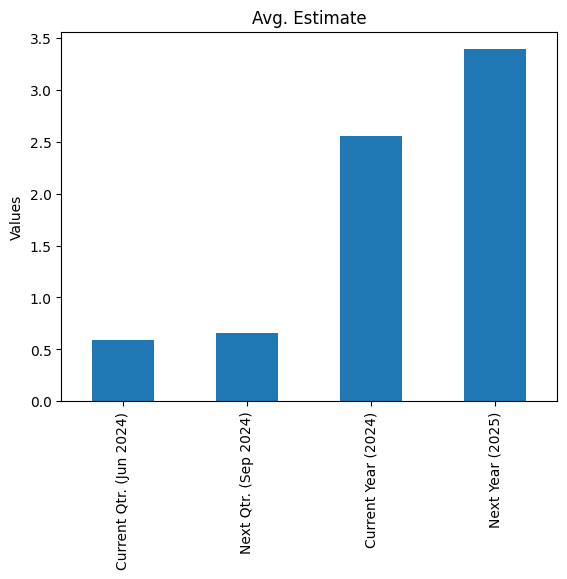

In [4]:
AvgEstimate = df[df["CURRENCY IN USD"] == "Avg. Estimate"]

# Select the first row of the filtered DataFrame (assuming you want to plot the first match)
row_to_plot = AvgEstimate.iloc[0]

# Drop the 'Company Name' column for the plot
data_to_plot = row_to_plot.drop('CURRENCY IN USD')

data_to_plot.plot(kind='bar', title=f'Avg. Estimate', ylabel='Values')
display(AvgEstimate)